### III.	Exploratory data analysis (EDA): visualization, statistics (descriptive & inferential), trends  & relationships

**A. EDA approcah**<br>
**B. Analysis of cancellation, delayed flights, and frequency of flights**
1. 2015 Cancelled and Diverted flights overview
2. Flights frequency - Temporal analysis
3. Flight frequency - Spatial analysis
4. Flight frequency - Airlines (carrier) analysis
**C. Analysis of flight delays: frequency, magnitude, reasons, temporal, spatial and carrier-based analysis**
1. Understand the relationship between variables
2. Delays at departure vs. delays at arrival
3. Delays @ Arrival (AD): frequency vs. magnitude
4. Flight delays distribution by reason
5. Flight delays carrier-based analysis
6. Flight delays temporal analysis

####  <font color=blue>Import python libraries and cleaned data file

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import squarify
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import datetime
import time
import random
import os
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20, 10)

#magic panda line that renders the figure in a notebook
%matplotlib inline

In [2]:
#import file
flights_FINAL = pd.read_csv(
    "/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/flights_FINAL.csv",
    low_memory=False)

#reducing the file memory usage by changind the dtypes
dtype = {
    'YEAR': 'int16',
    'MONTH': 'int8',
    'DAY': 'int8',
    'DAY_OF_WEEK': 'int8',
    'ARL_CODE': 'category',
    'DEPARTURE_DELAY': 'float32',
    'TAXI_OUT': 'float32',
    'ELAPSED_TIME': 'float32',
    'AIR_TIME': 'float32',
    'DISTANCE': 'int16',
    'TAXI_IN': 'float32',
    'ARRIVAL_DELAY': 'float32',
    'DIVERTED': 'int8',
    'CANCELLED': 'int8',
    'CANCELLATION_REASON': 'category',
    'AIR_SYSTEM_DELAY': 'float32',
    'SECURITY_DELAY': 'float32',
    'AIRLINE_DELAY': 'float32',
    'LATE_AIRCRAFT_DELAY': 'float32',
    'WEATHER_DELAY': 'float32'
}
flights_FINAL = pd.read_csv(
    "/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/flights_FINAL.csv",
    low_memory=False,
    dtype=dtype)

#drop a few columns I know I will not use
flights_FINAL = flights_FINAL.drop(columns=[
    'LATITUDE_org', 'LONGITUDE_org', 'LATITUDE_dst', 'LONGITUDE_dst',
    'COUNTRY_org', 'COUNTRY_dst'
])

#airlines file includes the airlines 2-letter code
airlines = pd.read_csv(
    "/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/airlines.csv"
)

In [3]:
#set a dictionary for the airlines codes
ARL_dict = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
ARL_dict

{'UA': 'United Air Lines Inc.',
 'AA': 'American Airlines Inc.',
 'US': 'US Airways Inc.',
 'F9': 'Frontier Airlines Inc.',
 'B6': 'JetBlue Airways',
 'OO': 'Skywest Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'WN': 'Southwest Airlines Co.',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'VX': 'Virgin America'}

In [4]:
flights_FINAL['Date'] = pd.to_datetime(flights_FINAL['Date'])
flights_FINAL['Date'].dtype

dtype('<M8[ns]')

In [5]:
#summary table
pd.concat([
    flights_FINAL.dtypes,
    flights_FINAL.count(),
    flights_FINAL.nunique(),
    flights_FINAL.isnull().sum(),
    round(100 * flights_FINAL.isnull().sum() / len(flights_FINAL), 1)
],
          axis=1).rename(
              columns={
                  0: 'Dtype',
                  1: 'Non-null counts',
                  2: 'Unique values',
                  3: 'Missing Nulls',
                  4: 'Missing (%)'
              })

,Dtype,Non-null counts,Unique values,Missing Nulls,Missing (%)
YEAR,int16,5819079,1,0,0.0
MONTH,int8,5819079,12,0,0.0
DAY,int8,5819079,31,0,0.0
DAY_OF_WEEK,int8,5819079,7,0,0.0
ARL_CODE,category,5819079,14,0,0.0
SCHEDULED_DEPARTURE,object,5819079,1321,0,0.0
DEPARTURE_TIME,object,5732926,1440,86153,1.5
DEPARTURE_DELAY,float32,5732926,1217,86153,1.5
TAXI_OUT,float32,5730032,184,89047,1.5
WHEELS_OFF,object,5730032,1440,89047,1.5


####  <font color=blue>A. EDA approach

<img src="EDA_Approach.png" 
     align="left"
     style="width:800px; height:460px"/>

####  <font color=blue>B. Analysis of cancellation, delayed flights, and frequency of flights

#### <font color=blue>1. 2015 Cancelled and Diverted flights overview

##### Q1: How many cancelled, diverted, & actual flights occurred? (Pie chart)

In [6]:
#create a column to assign an outcome of a flight: occured (F), cancelled (C), or diverted (D)

#create a list of conditions
conditions = [
    (flights_FINAL['DIVERTED'] == 1), (flights_FINAL['CANCELLED'] == 1),
    (flights_FINAL['DIVERTED'] == 0) & (flights_FINAL['CANCELLED'] == 0)
]

#create a list of values I want to assign for each condition
values = ['Type_D', 'Type_C', 'Type_F']

#create a new column and use np.select to assign values to it using the list as arguments
flights_FINAL['Types_FCD'] = np.select(conditions, values)
flights_FINAL['Types_FCD'].head()

0    Type_F
1    Type_F
2    Type_F
3    Type_F
4    Type_F
Name: Types_FCD, dtype: object

In [7]:
#create a df with counts of each unique value
FCD_counts = flights_FINAL['Types_FCD'].value_counts()
FCD_counts

Type_F    5714008
Type_C      89884
Type_D      15187
Name: Types_FCD, dtype: int64

In [8]:
#counts as percentage(%)
round(flights_FINAL['Types_FCD'].value_counts(normalize=True), 3) * 100

Type_F    98.2
Type_C     1.5
Type_D     0.3
Name: Types_FCD, dtype: float64

Text(0.5, 1.0, 'Occurred-Flights (F)\n vs. Cancelled (C) vs. Diverted (D)')

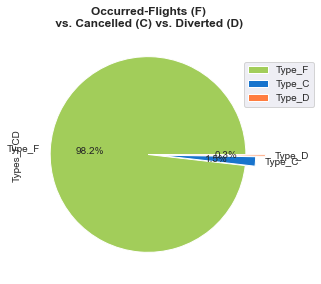

In [9]:
# create a pie chart for FDC
#text size libary
small = 8
medium = 10
large = 12
xl = 14

fig_1, ax_1 = plt.subplots(num=1, figsize=(4.5, 4.5))

my_explode = (0, 0.1, 0.2)
my_colors = ['#A2CD5A', '#1874CD', '#FF7D40']

FCD_counts.plot.pie(legend=True,
                    autopct='%0.1f%%',
                    explode=my_explode,
                    colors=my_colors,
                    fontsize=medium)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.9))
plt.title('Occurred-Flights (F)\n vs. Cancelled (C) vs. Diverted (D)',
          fontsize=large,
          fontweight='bold')

>**In 2015, out of 5.8 MM domestic flights**<br>
>* 1.5% of flights were **Cancelled (C)** (89,884 flights)<br>
>* 0.3% of flights were **Diverted (D)** (15,187 flights)<br>
>* 98.2% of flights of **did occur (F)** (5,714,008 flights)

##### Q2: What is the monthly variation of the Cancelled & Diverted flights?

###### The distribution of Cancelled & Diverted flights by month (Line chart)

In [10]:
# create a subset for the flighst that were either cancelled or diverted
Type_CD = flights_FINAL[(flights_FINAL['CANCELLED'] == 1) |
                        (flights_FINAL['DIVERTED'] == 1)].reset_index(
                            drop=True)

# extract a few columns of interest to narrow the data frame
Type_CD_short = Type_CD[[
    'MONTH', 'CANCELLED', 'DIVERTED', 'Types_FCD', 'ARL_CODE', 'ORG_ARP_FINAL'
]]

# create  data frame grouped by month, cancelled, & diverted to see the monthly variation
Type_CD_grouped = Type_CD_short.groupby(['MONTH', 'CANCELLED',
                                         'DIVERTED']).count().reset_index()
Type_CD_grouped

,MONTH,CANCELLED,DIVERTED,Types_FCD,ARL_CODE,ORG_ARP_FINAL
0,1,0,1,973,973,973
1,1,1,0,11982,11982,11982
2,2,0,1,1011,1011,1011
3,2,1,0,20517,20517,20517
4,3,0,1,1172,1172,1172
5,3,1,0,11002,11002,11002
6,4,0,1,1380,1380,1380
7,4,1,0,4520,4520,4520
8,5,0,1,1658,1658,1658
9,5,1,0,5694,5694,5694


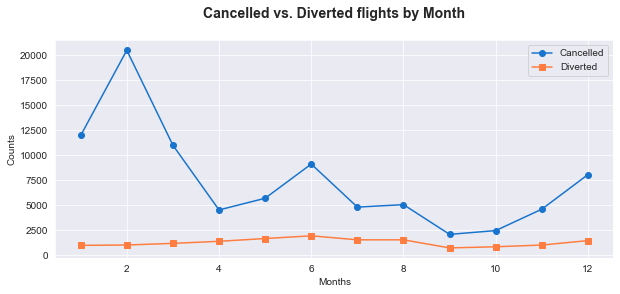

In [11]:
# create a df of the cancelled flights only
Type_C = Type_CD_grouped[(
    Type_CD_grouped['CANCELLED'] == 1)].set_index('MONTH')
# rename column to correspond to Cancelled flights
Type_C.rename(columns={'Types_FCD': 'Type_C'}, inplace=True)

# create df for the diverted flights only
Type_D = Type_CD_grouped[(Type_CD_grouped['DIVERTED'] == 1)].set_index('MONTH')
Type_D.rename(columns={'Types_FCD': 'Type_D'}, inplace=True)

fig_2, ax = plt.subplots(num=2, figsize=(10, 4))
Type_C['Type_C'].plot(marker='o', label='Cancelled', color='#1874CD')
Type_D['Type_D'].plot(marker='s', label='Diverted', color='#FF7D40')
ax.set_xlabel('Months', fontsize=medium)
ax.set_ylabel('Counts', fontsize=medium)
plt.title('Cancelled vs. Diverted flights by Month\n',
          fontsize=xl,
          fontweight='bold')
plt.legend()

##### Q3: How Cancelled & Diverted flights vary by airline?

###### The distribution of Cancelled & Diverted flights by Carrier (Bar chart)

In [12]:
#create  data frame grouped by Airline
Type_CD_gr_ARL = Type_CD_short.groupby(
    ['ARL_CODE', 'CANCELLED', 'DIVERTED', 'Types_FCD']).count().reset_index()
Type_CD_gr_ARL = Type_CD_gr_ARL.sort_values('MONTH', ascending=False)
Type_CD_gr_ARL.head(20)

,ARL_CODE,CANCELLED,DIVERTED,Types_FCD,MONTH,ORG_ARP_FINAL
108,WN,1,0,Type_C,16043.0,16043.0
36,EV,1,0,Type_C,15231.0,15231.0
60,MQ,1,0,Type_C,15025.0,15025.0
4,AA,1,0,Type_C,10919.0,10919.0
76,OO,1,0,Type_C,9960.0,9960.0
84,UA,1,0,Type_C,6573.0,6573.0
20,B6,1,0,Type_C,4276.0,4276.0
92,US,1,0,Type_C,4067.0,4067.0
28,DL,1,0,Type_C,3824.0,3824.0
107,WN,0,1,Type_D,3409.0,3409.0


In [13]:
#create a df for cancelled flights
Type_C_gr_ARL = Type_CD_gr_ARL[(
    Type_CD_gr_ARL['CANCELLED'] == 1)].reset_index()

#create a df for diverted flights only
Type_D_gr_ARL = Type_CD_gr_ARL[(Type_CD_gr_ARL['DIVERTED'] == 1)].reset_index()

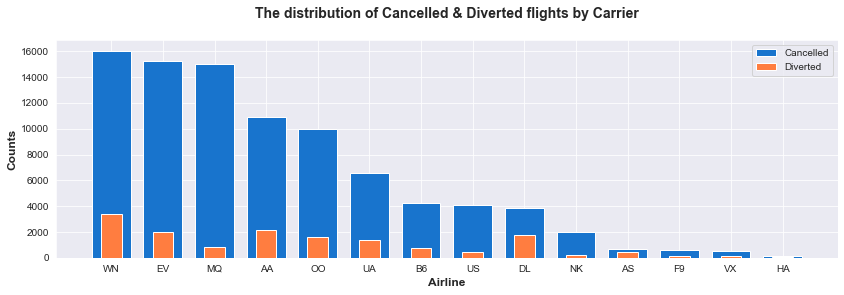

In [14]:
fig3, ax = plt.subplots(num=3, figsize=(14, 4))
plt.bar(Type_C_gr_ARL.ARL_CODE,
        Type_C_gr_ARL['MONTH'] + 0.4,
        width=0.75,
        label='Cancelled',
        color='#1874CD')
plt.bar(Type_D_gr_ARL.ARL_CODE,
        Type_D_gr_ARL['MONTH'],
        width=0.40,
        label='Diverted',
        color='#FF7D40')
plt.title('The distribution of Cancelled & Diverted flights by Carrier\n',
          fontsize=xl,
          fontweight='bold')
ax.set_xlabel('Airline', fontsize=large, fontweight='bold')
ax.set_ylabel('Counts', fontsize=large, fontweight='bold')
plt.legend()

###### Cancelled & Diverted flights by Carrier (Box plot)

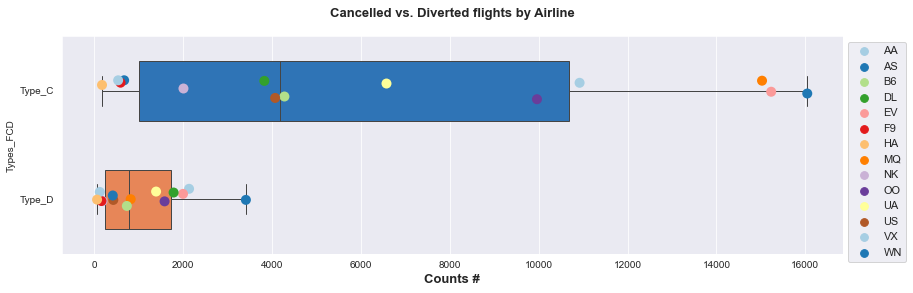

In [15]:
# create a box plot showing the distribution of the Cancelled and Diverted flights by airline
plt.figure(figsize=(14, 4))
my_pal = {'Type_C': '#1874CD', 'Type_D': '#FF7D40'}

sns.boxplot(y='Types_FCD',
            x='MONTH',
            data=Type_CD_gr_ARL,
            linewidth=1,
            width=0.55,
            palette=my_pal)
sns.stripplot(y='Types_FCD',
              x='MONTH',
              data=Type_CD_gr_ARL,
              color='#ADFF2F',
              size=10,
              hue='ARL_CODE',
              palette='Paired')
plt.xlabel('Counts #', size=13, fontweight='bold')
plt.title('Cancelled vs. Diverted flights by Airline\n',
          size=13,
          fontweight='bold')
plt.legend(loc=0, bbox_to_anchor=(1, 1), fontsize=11)

###### Cancelled & Diverted flights by Carrier (3-dimension Cross-plot)

In [16]:
#create  data frame for Cancelled flights grouped by Airline (X axis)
Type_C_ARL = pd.DataFrame(
    flights_FINAL.groupby(['ARL_CODE'])['CANCELLED'].sum().reset_index())

In [17]:
#create a data frame for Diverted flights grouped by Airline (Y axis)
Type_D_ARL = pd.DataFrame(
    flights_FINAL.groupby(['ARL_CODE'])['DIVERTED'].sum().reset_index())
Type_D_ARL = Type_D_ARL.rename(columns={'ARL_CODE': 'ARL_CODE_1'})

In [18]:
#create a data frame counting the flights by airline
Count_ARL = pd.DataFrame(
    flights_FINAL.groupby(['ARL_CODE'])['Types_FCD'].count().reset_index())
Count_ARL = Count_ARL.rename(columns={'ARL_CODE': 'ARL_CODE_2'})

In [19]:
#combine the 3 dataframes
df1 = pd.concat([Type_C_ARL, Type_D_ARL, Count_ARL],
                axis=1).reset_index(drop=True)
df1 = df1.drop(columns=['ARL_CODE_1', 'ARL_CODE_2'])
df1

,ARL_CODE,CANCELLED,DIVERTED,Types_FCD
0,AA,10919.0,2130.0,725984
1,AS,669.0,413.0,172521
2,B6,4276.0,730.0,267048
3,DL,3824.0,1782.0,875881
4,EV,15231.0,1994.0,571977
5,F9,588.0,158.0,90836
6,HA,171.0,60.0,76272
7,MQ,15025.0,816.0,294632
8,NK,2004.0,182.0,117379
9,OO,9960.0,1579.0,588353


In [20]:
flights_mx = df1.corr()
flights_mx

,CANCELLED,DIVERTED,Types_FCD
CANCELLED,1.000000,0.789591,0.688791
DIVERTED,0.789591,1.000000,0.975799
Types_FCD,0.688791,0.975799,1.000000


Text(0.5, 1.0, 'Heat map\n Cancellations vs. Diversions vs. Flight counts\n')

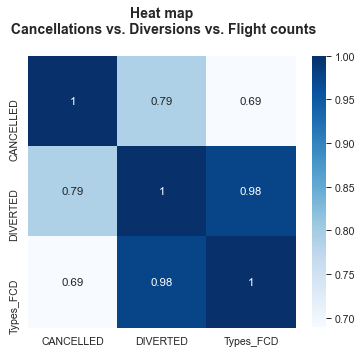

In [21]:
#create a heatmap to indentify the variables that corelate
plt.figure(figsize=(6, 5))
sns.set_context('paper', font_scale=1.2)

flights_mx = df1.corr()
sns.heatmap(flights_mx, annot=True, cmap='Blues')

plt.title('Heat map\n Cancellations vs. Diversions vs. Flight counts\n',
          size=14,
          fontweight='bold')

Text(0.5, 1.0, 'Cancellations vs. Diversions by Airline')

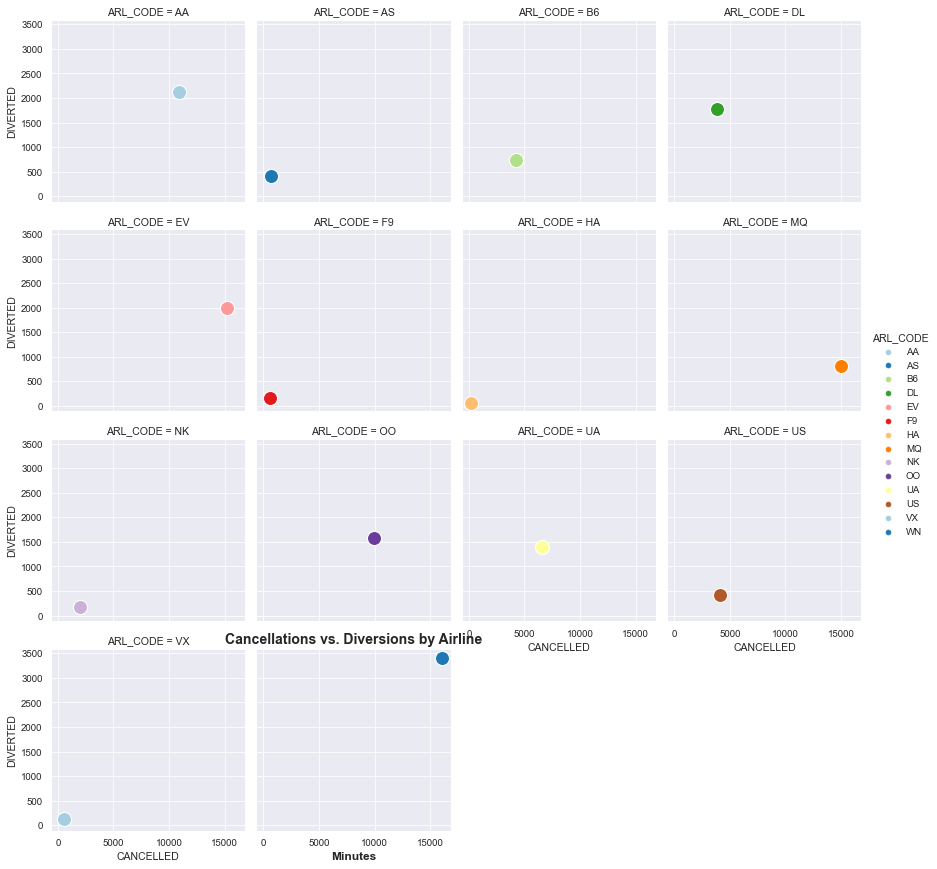

In [22]:
# create regression plots
sns.set_context('paper',font_scale=1.1)

sns.relplot(x='CANCELLED', y='DIVERTED',
            kind='scatter', data=df1, hue='ARL_CODE', palette='Paired', s=200,
           col='ARL_CODE', col_wrap=4, height=3)
plt.xlabel('Minutes',size=12, fontweight='bold')
plt.ylabel('Minutes',size=12, fontweight='bold')
plt.title('Cancellations vs. Diversions by Airline',
          size=14, fontweight='bold')

Text(0.5, 1.0, 'Cancellations vs. Flight counts by Airline')

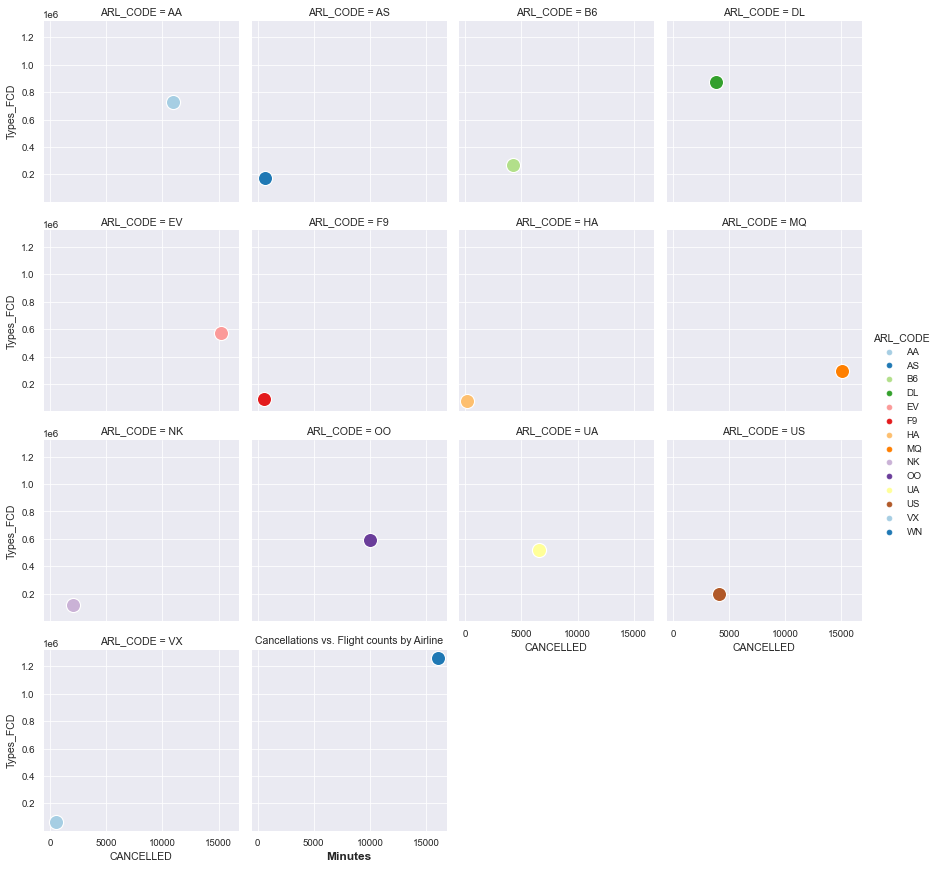

In [23]:
# create regression plots
sns.set_context('paper',font_scale=1.1)
sns.relplot(x='CANCELLED', y='Types_FCD',
            kind='scatter', data=df1, hue='ARL_CODE', palette='Paired', s=200,
           col='ARL_CODE', col_wrap=4, height=3)
plt.xlabel('Minutes',size=12, fontweight='bold')
plt.ylabel('Minutes',size=12, fontweight='bold')
plt.title('Cancellations vs. Flight counts by Airline')

Text(0.5, 1.0, 'Diversions vs. Flight counts by Airline')

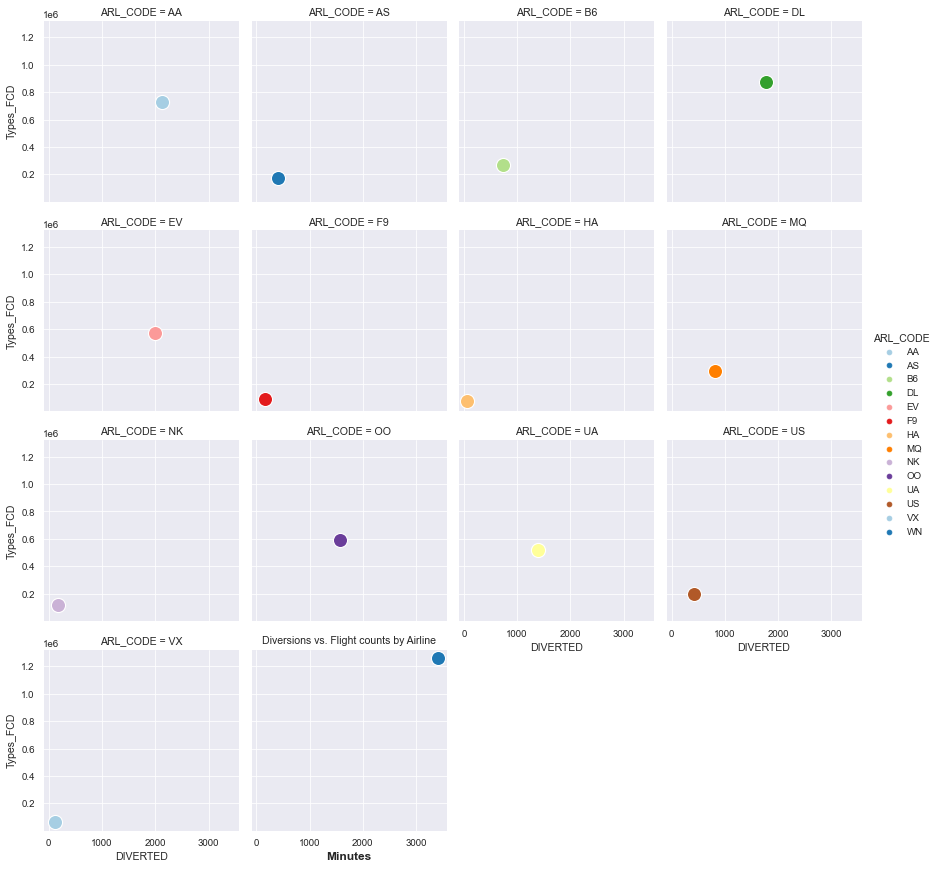

In [24]:
# create regression plots
sns.set_context('paper',font_scale=1.1)
sns.relplot(x='DIVERTED', y='Types_FCD',
            kind='scatter', data=df1, hue='ARL_CODE', palette='Paired', s=200,
           col='ARL_CODE', col_wrap=4, height=3)
plt.xlabel('Minutes',size=12, fontweight='bold')
plt.ylabel('Minutes',size=12, fontweight='bold')
plt.title('Diversions vs. Flight counts by Airline')

Text(13.320937333333333, 0.5, 'Diverted flights (#)')

<Figure size 288x288 with 0 Axes>

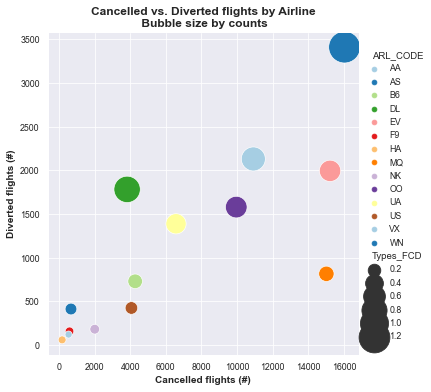

In [25]:
#create a 3-dimenion cross-plot
ax, plt.figure(figsize=(4, 4))
sns.set_context('paper')
sns.relplot(x='CANCELLED',
            y='DIVERTED',
            kind='scatter',
            data=df1,
            hue='ARL_CODE',
            palette='Paired',
            size='Types_FCD',
            sizes=(50, 1000))
plt.ylim=(0, 16000)
plt.title('Cancelled vs. Diverted flights by Airline\n Bubble size by counts',
          fontsize=12,
          fontweight='bold')
plt.xlabel('Cancelled flights (#)', fontsize=10, fontweight='bold')
plt.ylabel('Diverted flights (#)', fontsize=10, fontweight='bold')

###### How the rates of Cancelled & Diverted flights vary by Carrier (Cross-plot)

In [26]:
df2 = flights_FINAL.groupby('ARL_CODE')['Types_FCD'].value_counts()
df2.head()

ARL_CODE  Types_FCD
AA        Type_F       712935
          Type_C        10919
          Type_D         2130
AS        Type_F       171439
          Type_C          669
Name: Types_FCD, dtype: int64

In [27]:
#the proportion of cancelled & diverted flights for each airline
df2 = round(
    flights_FINAL.groupby('ARL_CODE')['Types_FCD'].value_counts(
        normalize=True).unstack() * 100, 1).reset_index()

Text(0.5, 1.0, 'Cancelled vs. Diverted rates by Airline\n')

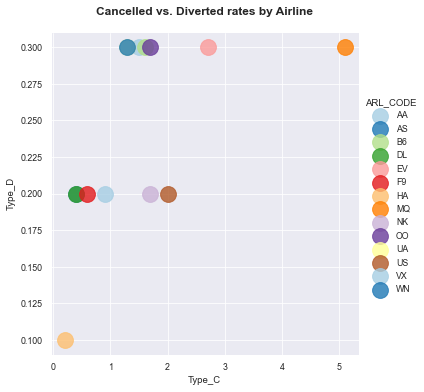

In [28]:
#cross plot between cancelled & diverted rations by airline
sns.set_context('paper', font_scale=1)
sns.lmplot(x='Type_C',
           y='Type_D',
           data=df2,
           hue='ARL_CODE',
           palette='Paired',
           scatter_kws={'s': 250})
plt.title('Cancelled vs. Diverted rates by Airline\n',
          size=12,
          fontweight='bold')

##### Q4: Why cancellations happened?

>**Cancellation reasons:**
4 main causes (A, B, C, D) as defined by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics
>- A = Carrier caused
>- B = Weather
>- C = National Aviation System
>- D = Security

###### Percentage distribution of Cancellation reasons (Pie chart)

In [29]:
#create a series of counts of each unique value
C_reason_counts = flights_FINAL['CANCELLATION_REASON'].value_counts()
C_reason_counts

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

In [30]:
#create a series of counts of each unique value
C_prc = round(
    flights_FINAL['CANCELLATION_REASON'].value_counts(normalize=True) * 100, 2)
C_prc

B    54.35
A    28.11
C    17.52
D     0.02
Name: CANCELLATION_REASON, dtype: float64

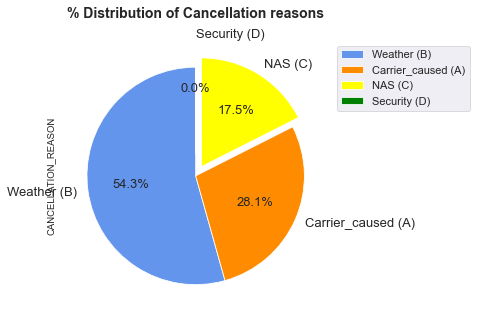

In [31]:
# create a pie chart for FDC
labels = ['Weather (B)', 'Carrier_caused (A)', 'NAS (C)', 'Security (D)']

fig, ax = plt.subplots(figsize=(5, 5))
my_explode = (0, 0, 0.1, 0.2)
my_colors = ['cornflowerblue', 'darkorange', 'yellow', 'green']
C_reason_counts.plot(kind='pie',
                     legend=True,
                     radius=1,
                     autopct='%0.1f%%',
                     explode=my_explode,
                     colors=my_colors,
                     fontsize=13,
                     startangle=90,
                     labels=labels)
plt.title('% Distribution of Cancellation reasons\n',
          fontsize=xl,
          fontweight='bold')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=11)

###### Overall Distribution of Cancellation reasons (Histogram, absolute counts)

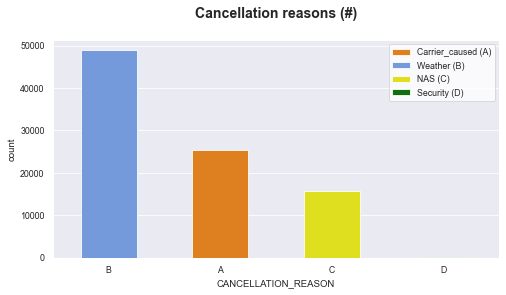

In [32]:
#A=Carrier caused; B = Weather, C = National Aviation System, D = Security
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
labels = ['Carrier_caused (A)', 'Weather (B)', 'NAS (C)', 'Security (D)']

my_pal = {'B': '#6495ED', 'A': '#FF8000', 'C': '#FFFF00', 'D': '#008000'}
sns.set_style('white')
sns.set_style('ticks')

ax = sns.countplot(
    x='CANCELLATION_REASON',
    data=flights_FINAL,
    hue='CANCELLATION_REASON',
    order=flights_FINAL['CANCELLATION_REASON'].value_counts().index,
    palette=my_pal,
    dodge=False)


def change_width(ax, new_value):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)


change_width(ax, .5)
plt.title('Cancellation reasons (#)\n', fontsize=xl, fontweight='bold')
plt.legend(labels)

###### Temporal distribution of the cancellation reasons

###### Variation of the Cancellation reasons by month (Stacked bar chart & Line chart)

In [33]:
flights_FINAL['MONTH'] = flights_FINAL['MONTH'].astype(str)
flights_FINAL['MONTH'].replace(
    {
        '1': '01',
        '2': '02',
        '3': '03',
        '4': '04',
        '5': '05',
        '6': '06',
        '7': '07',
        '8': '08',
        '9': '09'
    },
    inplace=True)

CNLC_month_all = flights_FINAL.groupby('MONTH').agg(
    {'CANCELLATION_REASON': ['count']})

CNLC_month_all.reset_index(inplace=True)

In [34]:
#create a series of counts of each unique value
CNLC_month = flights_FINAL.groupby(
    ['MONTH'])['CANCELLATION_REASON'].value_counts().to_frame()
CNLC_month = CNLC_month.sort_values(by='MONTH')

#rename one of the Cancellation reasons columns
CNLC_month.rename(columns={CNLC_month.columns[0]: 'Counts'}, inplace=True)

CNLC_month.reset_index(inplace=True)
CNLC_month.head()

,MONTH,CANCELLATION_REASON,Counts
0,01,B,7020
1,01,A,2874
2,01,C,2087
3,01,D,1
4,02,B,15447


In [35]:
CNLC_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   MONTH                43 non-null     object  
 1   CANCELLATION_REASON  43 non-null     category
 2   Counts               43 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 1.0+ KB


Text(0.5, 1.0, 'Variation of Cancellation reasons (#) by Month\n')

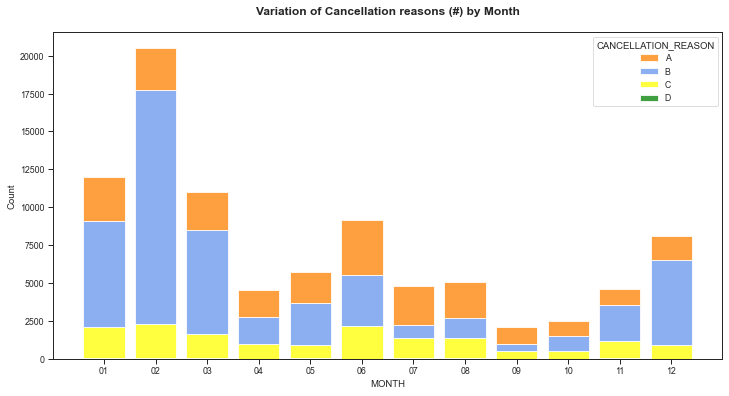

In [36]:
## create a stacked bar chart
plt.figure(figsize=(12, 6))
my_pal_DC = {'Type_C': '#1874CD', 'Type_D': '#FF7D40'}
flights_FINAL['MONTH'] = flights_FINAL['MONTH'].astype(str)

ax = sns.histplot(
    data=CNLC_month,
    x='MONTH',
    weights='Counts',
    hue='CANCELLATION_REASON',
    multiple='stack',
    palette=my_pal,
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8)
plt.title('Variation of Cancellation reasons (#) by Month\n',
          fontsize=12,
          fontweight='bold')

Text(0.5, 1.0, 'Variation of Cancellation reasons (#) by Month\n')

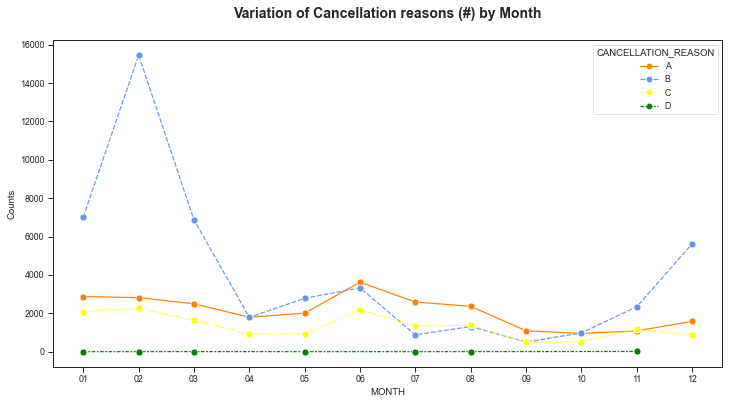

In [37]:
#A'Carrier_caused',B'Weather',C'NAS',D'Security'
# create a line chart

plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH',
             y='Counts',
             hue='CANCELLATION_REASON',
             data=CNLC_month,
             palette=my_pal,
             style='CANCELLATION_REASON',
             markers=['o', 'o', 'o', 'o'],
             markersize=7)
sns.set_style('dark')
plt.title('Variation of Cancellation reasons (#) by Month\n',
          fontsize=xl,
          fontweight='bold')

###### Variation of the Cancellation reasons by weekday (Stacked bar char & Line chart)

Text(0.5, 1.0, 'Variation of Cancellation reasons (#) by Weekday\n')

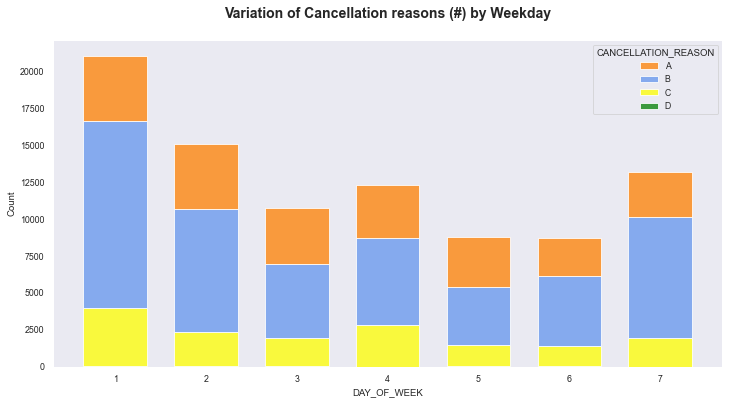

In [38]:
#change the data type for weekday to string
flights_FINAL['DAY_OF_WEEK'] = flights_FINAL['DAY_OF_WEEK'].astype(str)

#group the data by weekday and cancellation reasons
CNLC_day = flights_FINAL.groupby(
    ['DAY_OF_WEEK'])['CANCELLATION_REASON'].value_counts().to_frame()
CNLC_day.rename(columns={CNLC_day.columns[0]: 'Counts'}, inplace=True)
CNLC_day.reset_index(inplace=True)

#create a stacked bar chart
plt.figure(figsize=(12, 6))
sns.histplot(
    CNLC_day,
    x='DAY_OF_WEEK',
    # Use the value variable here to turn histogram counts into weighted
    # values.
    weights='Counts',
    hue='CANCELLATION_REASON',
    multiple='stack',
    palette=my_pal,
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.7)
plt.title('Variation of Cancellation reasons (#) by Weekday\n',
          fontsize=xl,
          fontweight='bold')

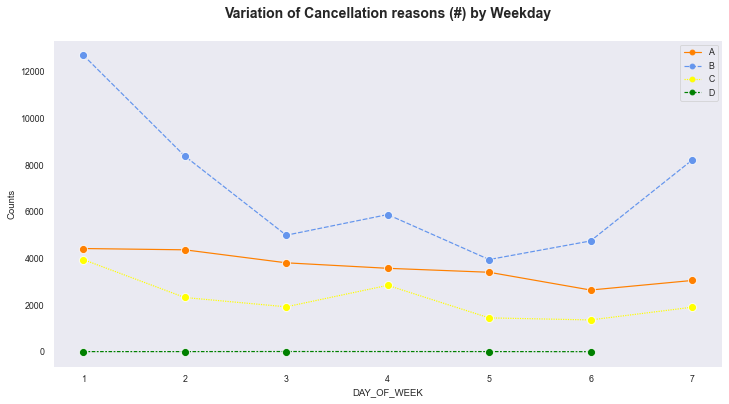

In [39]:
#create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='DAY_OF_WEEK',
             y='Counts',
             hue='CANCELLATION_REASON',
             data=CNLC_day,
             palette=my_pal,
             style='CANCELLATION_REASON',
             markers=['o', 'o', 'o', 'o'],
             markersize=8)
sns.set_style('dark')
plt.title('Variation of Cancellation reasons (#) by Weekday\n',
          fontsize=xl,
          fontweight='bold')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

###### Spatial (airport) variation of flights by the Cancellation reasons (USA map with pie chart)

<img src="CR_map2.png"
     align="left"/>

####  <font color=blue>2. Flights frequency - Temporal analysis

###### Q1:  How the number of flights varies by month?

In [40]:
flights_FINAL.shape

(5819079, 42)

In [41]:
#exclude the Cancelled flights
flights_F0 = flights_FINAL[(flights_FINAL['CANCELLED'] == 0)].reset_index(
    drop=True)
flights_F0.shape

(5729195, 42)

In [42]:
#exclude the Diverted flights
flights_F1 = flights_F0[(flights_F0['DIVERTED'] == 0)].reset_index(drop=True)
flights_F1.shape

(5714008, 42)

In [43]:
# 2015 average of fligts per month
mo_avg_flights = round(flights_F1['Types_FCD'].count() / 12, 0)
mo_avg_flights

476167.0

In [44]:
#2015 average of flights per weekday
weekday_avg_flights = round(flights_F1['Types_FCD'].count() / 7, 0)
weekday_avg_flights

816287.0

In [45]:
#2015 avg. flights per day
day_avg_flights = round(flights_F1['Types_FCD'].count() / 365, 0)
day_avg_flights

15655.0

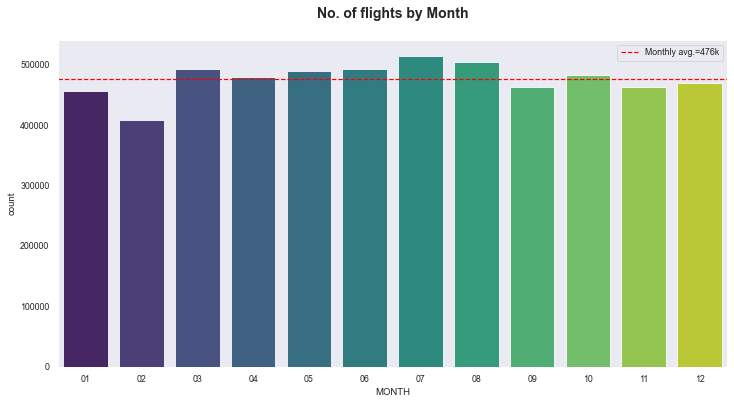

In [46]:
#create a bar chart with counts per month
plt.figure(figsize=(12, 6))
sns.countplot(x='MONTH', data=flights_F1, palette='viridis')

#Drawing a horizontal line cprresponding to the average
plt.axhline(y=round(flights_F1['Types_FCD'].count() / 12, 0),
            color='r',
            linestyle='--',
            label='Monthly avg.=476k')

plt.title('No. of flights by Month\n', fontsize=xl, fontweight='bold')
plt.legend(loc='upper right')

> little variability
> annual avg. # about 485k; avg.% = 8.3%
> the busiest time are the summer months, followed by Spring; the least busiest are the fall months followed by winter by 

###### Q2: How the number of flights vary by the day of the week?

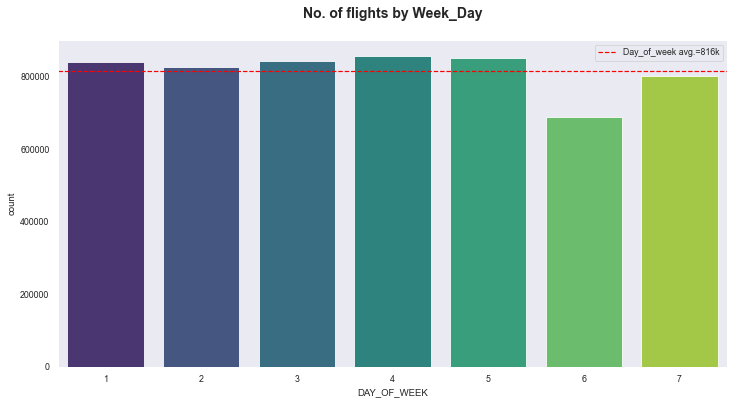

In [47]:
#sort the counts byt the day of the week
#1 = Monday
flights_F = flights_F1.sort_values(by='DAY_OF_WEEK')

#create a bar chart with counts per weekday
plt.figure(figsize=(12, 6))
sns.countplot(x='DAY_OF_WEEK', data=flights_F, palette='viridis')

#Drawing a horizontal line cprresponding to the average
plt.axhline(y=816287, color='r', linestyle='--', label='Day_of_week avg.=816k')

plt.title('No. of flights by Week_Day\n', fontsize=xl, fontweight='bold')
plt.legend()

####  <font color=blue>3. Flight frequency - Spatial analysis

###### USA geographic overview by airports, color coded by the number of flights occurred in 2015 (map)

<img src="Count_F_ARP4.png"
     align="left"/>

###### USA geographic overview by airports, sized by the number of flights occurred in 2015 (map)

<img src="Count_F_ARP2_noColors2.png"
     align="left"/>

###### Number of flights by airports

In [48]:
# 2015 average of fligts per airport
avg_flights_ARP = round(flights_F1['Types_FCD'].count() / 322, 0)
avg_flights_ARP

17745.0

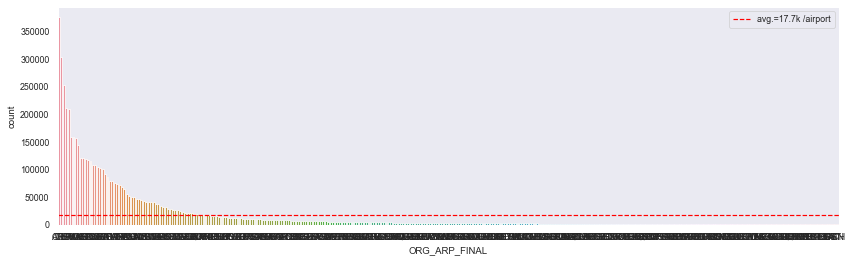

In [49]:
#what is the distribtuion of the number of flights per airports
plt.figure(figsize=(14, 4))
sns.countplot(x='ORG_ARP_FINAL',
              data=flights_F1,
              order=flights_F1['ORG_ARP_FINAL'].value_counts().index)

#Drawing a horizontal line cprresponding to the average
plt.axhline(y=avg_flights_ARP,
            color='r',
            linestyle='--',
            label='avg.=17.7k /airport')
plt.legend(loc='upper right')

In [50]:
#create a df with counts for each airport
flights_ARP = flights_F1.groupby(
    'Types_FCD')['ORG_ARP_FINAL'].value_counts().to_frame()

#rename column
flights_ARP.rename(columns={flights_ARP.columns[0]: 'f_Counts'}, inplace=True)

flights_ARP.reset_index(inplace=True)

flights_ARP = flights_ARP.drop(columns=['Types_FCD'])

In [51]:
flights_ARP

,ORG_ARP_FINAL,f_Counts
0,ATL,376015
1,ORD,304120
2,DFW,253233
3,DEN,211479
4,LAX,209631
...,...,...
317,DLG,77
318,STC,77
319,GST,76
320,AKN,63


In [52]:
flights_ARP.describe()

,f_Counts
count,322.000000
mean,17745.366460
std,43442.213698
min,30.000000
25%,946.000000
50%,2810.000000
75%,9634.500000
max,376015.000000


Text(0.5, 1.0, 'Boxplot Distribution of No. of flights by Airports\n')

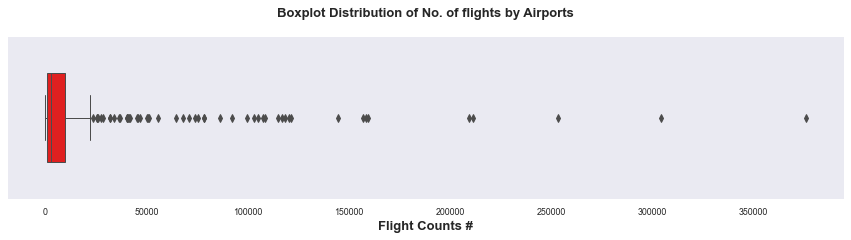

In [53]:
#crea a box plot for all airports at origing as a function of the number of flights during 2015
plt.figure(figsize=(15, 3))
sns.boxplot(x='f_Counts',
            data=flights_ARP,
            linewidth=1,
            width=0.55,
            color='red')
plt.xlabel('Flight Counts #', size=13, fontweight='bold')
plt.title('Boxplot Distribution of No. of flights by Airports\n',
          size=13,
          fontweight='bold')

<AxesSubplot:xlabel='f_Counts', ylabel='Density'>

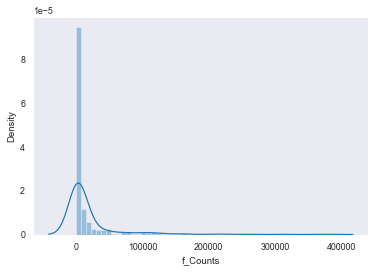

In [54]:
sns.distplot(flights_ARP['f_Counts'])

In [55]:
# create 6 backets by no of flights
#create a list of conditions
conditions = [(flights_ARP['f_Counts'] <= 500),
              (flights_ARP['f_Counts'] <= 1000),
              (flights_ARP['f_Counts'] <= 10000),
              (flights_ARP['f_Counts'] <= 100000),
              (flights_ARP['f_Counts'] <= 200000),
              (flights_ARP['f_Counts'] > 200000)]

#create a list of values I want to assign for each condition
values = ['XS', 'S', 'M', 'L', 'XL', 'XXL']

#create a new column and use np.select to assign values to it using the list as arguments
flights_ARP['ARP_f_grp'] = np.select(conditions, values)
flights_ARP['ARP_f_grp'].unique()

array(['XXL', 'XL', 'L', 'M', 'S', 'XS'], dtype=object)

In [56]:
flights_ARP_f_counts = flights_ARP['ARP_f_grp'].value_counts()
flights_ARP_f_counts

M      150
S       68
L       60
XS      26
XL      13
XXL      5
Name: ARP_f_grp, dtype: int64

In [57]:
round(flights_ARP['ARP_f_grp'].value_counts(normalize=True), 2) * 100

M      47.0
S      21.0
L      19.0
XS      8.0
XL      4.0
XXL     2.0
Name: ARP_f_grp, dtype: float64

(-1.1258133216644184,
 1.1012292059929216,
 -1.1186993416307096,
 1.122535504360607)

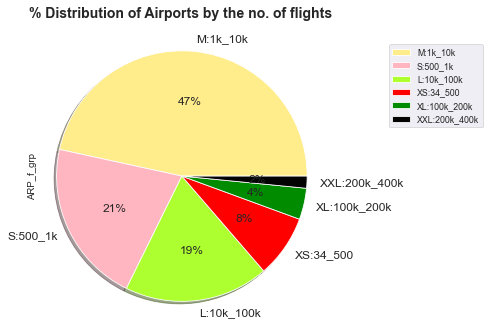

In [58]:
#create a pie chart for airports grouped by the number of flights in 2015
#colors: yellow,
fig, ax = plt.subplots(figsize=(5, 5))

clrs_ARP_f_gr = [
    '#FFEC8B', '#FFB6C1', '#ADFF2F', '#FF0000', '#008B00', '#030303'
]
mylabels = [
    'M:1k_10k', 'S:500_1k', 'L:10k_100k', 'XS:34_500', 'XL:100k_200k',
    'XXL:200k_400k'
]

flights_ARP_f_counts.plot.pie(legend=True,
                              autopct='%0.0f%%',
                              colors=clrs_ARP_f_gr,
                              fontsize=12,
                              shadow=True,
                              startangle=360,
                              labels=mylabels)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.title('% Distribution of Airports by the no. of flights\n',
          fontsize=14,
          fontweight='bold')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

>**The 2015 US domestic flights database includes 322 airports**; based on the number of flights corresponding to each airport,
>* 25% of the airports had a high volumes of flights above 10,000 (L, XL, XXL)<br>
>* 75% of the airports had 10,000 and below flights (M, S, & XS) <br>

In [59]:
#create a df summing the no of flights by group size
flights_ARP_grp_sum = flights_ARP.groupby(
    'ARP_f_grp')['f_Counts'].sum().sort_values()
flights_ARP_grp_sum

ARP_f_grp
XS        5516
S        51090
M       574322
XXL    1354478
XL     1637132
L      2091470
Name: f_Counts, dtype: int64

(-1.1698381689890787,
 1.3127079661789822,
 -1.1702696297229358,
 1.1808128797335566)

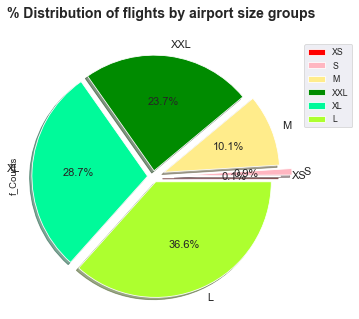

In [60]:
#create a pie chart for airports grouped by the number of flights in 2015
#colors: yellow, lightpink, greenyellow, red1, green4, gray1
fig, ax = plt.subplots(figsize=(5, 5))

clrs_ARP_f_gr1 = [
    '#FF0000', '#FFB6C1', '#FFEC8B', '#008B00', '#00FA9A', '#ADFF2F'
]
my_explode2 = (0.1, 0.2, 0.1, 0.05, 0.05, 0.05)

flights_ARP_grp_sum.plot.pie(legend=True,
                             autopct='%0.1f%%',
                             colors=clrs_ARP_f_gr1,
                             fontsize=11,
                             shadow=True,
                             startangle=360,
                             explode=my_explode2)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.title('% Distribution of flights by airport size groups\n',
          fontsize=14,
          fontweight='bold')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

>**The top 25% busiest US airports (XXL,XL,L) contributed by almost 90% to the total of US domestic flight volume in 2015**
>* the top 5 busiest airports (XXL) contributed by 24% to the 2015 flights: 1)Atlanta International Airport, 2) Chicago O'Hare International Airport, 3) Dallas/Fort Worth International Airport, 4) Denver International Airport, & 5) Los Angeles International Airport<br>
>* the next 13 busiest airports (XL) contributed by 29% to the 2015 flights

<AxesSubplot:>

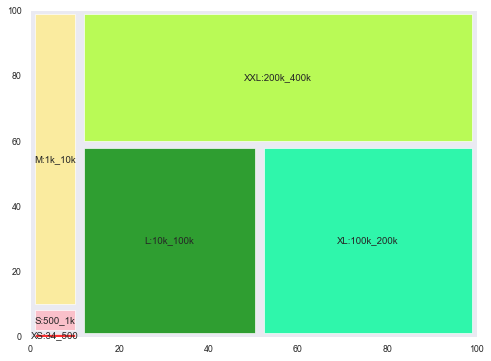

In [61]:
plt.figure(figsize=(8, 6))
size = [5516, 51090, 574322, 1354478, 1637132, 2091470]
mylabels2 = [
    'XS:34_500', 'S:500_1k', 'M:1k_10k', 'L:10k_100k', 'XL:100k_200k',
    'XXL:200k_400k'
]
squarify.plot(size, label=mylabels2, color=clrs_ARP_f_gr1, pad=True, alpha=0.8)

####  <font color=blue>4. Airline/Carrier analysis

###### Number of flights by airline

In [62]:
# 2015 average of fligts per airline
avg_flights_ARL = round(flights_F1['Types_FCD'].count() / 14, 0)
avg_flights_ARL

408143.0

Text(0.5, 1.0, 'The Distribution of No. of flights by Airline\n')

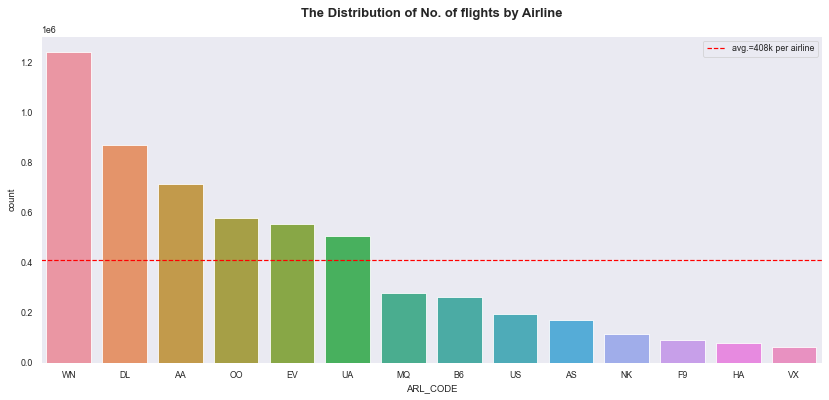

In [63]:
# create a histogram by airlines
plt.figure(figsize=(14, 6))
sns.countplot(x='ARL_CODE',
              data=flights_F1,
              order=flights_F1['ARL_CODE'].value_counts().index)

#Drawing a horizontal line cprresponding to the average
plt.axhline(y=avg_flights_ARL,
            color='r',
            linestyle='--',
            label='avg.=408k per airline')
plt.legend(loc='upper right')
plt.title('The Distribution of No. of flights by Airline\n',
          size=13,
          fontweight='bold')

In [64]:
#create a df with flight counts for each airline
flights_ARL = flights_F1.groupby(
    'Types_FCD')['ARL_CODE'].value_counts().to_frame()

#rename column
flights_ARL.rename(columns={flights_ARL.columns[0]: 'f_Counts'}, inplace=True)

flights_ARL.reset_index(inplace=True)

flights_ARL = flights_ARL.drop(columns=['Types_FCD'])

In [65]:
flights_ARL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ARL_CODE  14 non-null     category
 1   f_Counts  14 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 1006.0 bytes


In [66]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
flights_ARL.describe()

,f_Counts
count,14.00
mean,408143.43
std,352986.73
min,61248.00
25%,129254.50
50%,270416.50
75%,571298.50
max,1242403.00


###### Flight frequency distribution plots grouped by airlines

In [67]:
flights_ARL

,ARL_CODE,f_Counts
0,WN,1242403
1,DL,870275
2,AA,712935
3,OO,576814
4,EV,554752
5,UA,507762
6,MQ,278791
7,B6,262042
8,US,194223
9,AS,171439


Text(0.5, 1.0, 'Distribution of No. of flights by Airline\n')

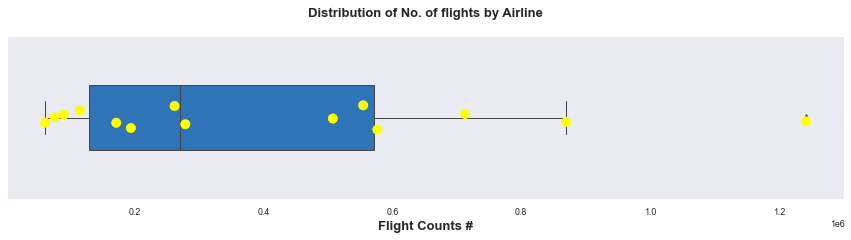

In [68]:
#creat a box plot for all airlines as a function of the number of flights during 2015
plt.figure(figsize=(15, 3))
sns.boxplot(x='f_Counts',
            data=flights_ARL,
            linewidth=1,
            width=0.4,
            color='#1874CD')
sns.stripplot(x='f_Counts',
              data=flights_ARL,
              size=10,
              hue='ARL_CODE',
              color='yellow')
plt.xlabel('Counts #', size=13, fontweight='bold')
plt.xlabel('Flight Counts #', size=13, fontweight='bold')
plt.title('Distribution of No. of flights by Airline\n',
          size=13,
          fontweight='bold')

<AxesSubplot:xlabel='f_Counts', ylabel='Density'>

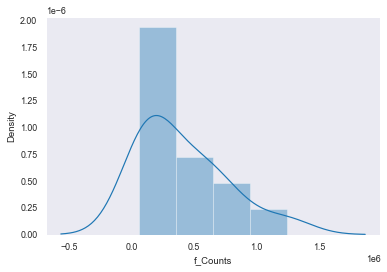

In [69]:
# the distribtion of the flight counts grouped by airlines
sns.distplot(flights_ARL['f_Counts'])

In [70]:
x = round(flights_ARL['f_Counts'] / flights_ARL['f_Counts'].sum() * 100, 1)
x

0    21.70
1    15.20
2    12.50
3    10.10
4     9.70
5     8.90
6     4.90
7     4.60
8     3.40
9     3.00
10    2.00
11    1.60
12    1.30
13    1.10
Name: f_Counts, dtype: float64

In [71]:
y = round(flights_ARL['f_Counts'] / flights_ARL['f_Counts'].sum() * 100,
          1).cumsum()
y

0     21.70
1     36.90
2     49.40
3     59.50
4     69.20
5     78.10
6     83.00
7     87.60
8     91.00
9     94.00
10    96.00
11    97.60
12    98.90
13   100.00
Name: f_Counts, dtype: float64

###### Flight frequency pie chart

(-1.1122946213360125,
 1.1051044674450459,
 -1.1034483996359294,
 1.1001642095064728)

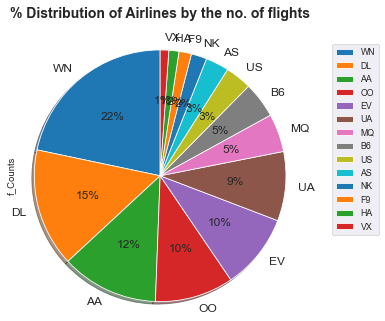

In [72]:
#create a pie chart for airlines grouped by the number of flights in 2015
#colors: yellow,
fig, ax = plt.subplots(figsize=(5, 5))

x.plot.pie(legend=True,
           autopct='%0.0f%%',
           fontsize=12,
           labels=flights_ARL['ARL_CODE'],
           shadow=True,
           startangle=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('% Distribution of Airlines by the no. of flights\n',
          fontsize=14,
          fontweight='bold')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

>**The top 3 (25%) busiest airlines contributed by almost 50% to the total of US domestic flight volume in 2015**
>* 1) Southwest Airlines Co. (22% of volume)
>* 2) Delta (15%)
>* 3)American Airlines (12.5%)

>**Top 50% of the airlines provided almost 85% of the 2015 domestic flights**